In [284]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of ontotransserver failed: Traceback (most recent call last):
  File "c:\users\treesaj\appdata\local\programs\python\python39\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "c:\users\treesaj\appdata\local\programs\python\python39\lib\site-packages\IPython\extensions\autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "c:\users\treesaj\appdata\local\programs\python\python39\lib\site-packages\IPython\extensions\autoreload.py", line 347, in update_generic
    update(a, b)
  File "c:\users\treesaj\appdata\local\programs\python\python39\lib\site-packages\IPython\extensions\autoreload.py", line 317, in update_class
    update_instances(old, new)
  File "c:\users\treesaj\appdata\local\programs\python\python39\lib\site-packages\IPython\extensions\autoreload.py", line 280, in update_instances
    ref.__class__ = new
TypeError: __class__ assignment: 'DataResource' object layo

In [285]:
# Connect to the OntoTransServer ..
from ontotransserver import OntoTransServer
server = OntoTransServer('http://localhost:8000/api/v1')

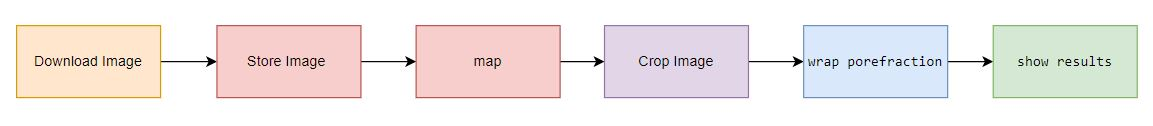

In [274]:
from IPython.display import Image
Image("pipeline.jpg")

In [275]:
# Instantiate Download Image strategy
downloadImage = server.create_dataresource(downloadUrl="https://gitlab.cc-asp.fraunhofer.de/api/v4/projects/20644/repository/files/batch1-3_40x.jpg/raw?ref=master&private_token=a6m-ny6wCVqQjfJEtnU5", mediaType="image/jpg")

# Instantiate Store Image strategy 
storeImage = server.create_filter(filterType="filter/compevo-store")

# Instantiate Mapping strategy 
mapping = server.create_mapping(mappingType="mapping/compevo-map",configuration={"use_case": 'CompEvo','image_type':'image/jpeg','image_description':'Pores'})

# Instantiate crop filter strategy 
cropFilter = server.create_filter(filterType="filter/compevo-crop",configuration={"crop": "440,8056,668,1640"})

# Instantiate wrapPorefraction Transformation strategy 
wrapPorefractionTransformation = server.create_transformation(transformation_type= "dlite/compevo-wrap-porefraction")

# Instantiate getResult strategy 
getResult = server.create_transformation(transformation_type= "dlite/compevo-result")

In [278]:
# Build a pipeline
pipeline = downloadImage >> storeImage >> mapping  >> cropFilter >> wrapPorefractionTransformation >> getResult

#Excecute a pipline and print result
print(pipeline.get())

session-1df105d9-ecf1-4c83-b42d-109d1b54d4cd
b'{"PoreFraction":"Pore fraction: 8.5%"}'
